In [ ]:
import pandas as pd
import json
import os
import ast
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_json('base_mcqs.json')
df.head()

,question,option_a,option_b,option_c,option_d,correct_option,index
0,What can be a serious consequence of gas effus...,Increased lung capacity,Gastrointestinal distress,Gaseous tamponade leading to haemodynamic failure,Improved oxygen saturation,C,0
1,"During a clinical examination, which of the fo...",Gastrointestinal signs and symptoms,Respiratory signs and haemodynamic signs,Neurological deficits and muscle weakness,Skin rashes and allergic reactions,B,1
2,Which combination of symptoms and physical sig...,"Sudden 'stabbing' chest pain, dyspnoea, subcut...","Chronic cough, wheezing, hyperresonance on per...","Fever, productive cough, dull percussion, and ...","Sudden 'stabbing' chest pain, breathing diffic...",A,2
3,"In the context of smoking cessation, what is t...",Pleurodesis is a primary method for smoking ce...,Pleurodesis is a procedure that helps in the p...,Pleurodesis is a specialist discussion conside...,Pleurodesis is a surgery to remove all tobacco...,C,3
4,"When evaluating a patient for a pneumothorax, ...",Standard chest X-ray in a standing position,Pleural ultrasound,CT scan,MRI of the chest,C,5


In [ ]:
lisa_sheets = pd.read_csv('questions.csv')
lisa_sheets.head()

,folder,content,question
0,IC-360,{{knowledge objective\n|Identifiant=OIC-360-01...,"{'question': 'What is pneumothorax?', 'option_..."
1,IC-360,{{knowledge objective\n|Identifiant=OIC-360-08...,{'question': 'What is a key factor in determin...
2,IC-360,{{knowledge objective\n|Identifiant=OIC-360-03...,{'question': 'Which of the following is a clin...
3,IC-360,{{knowledge objective\n|Identifiant=OIC-360-11...,{'question': 'What is a recommended measure to...
4,IC-360,{{knowledge objective\n|Identifiant=OIC-360-10...,{'question': 'When is pleural drainage indicat...


In [ ]:
df = df.join(lisa_sheets[['folder']], on='index')
df.head()

,question,option_a,option_b,option_c,option_d,correct_option,index,question_length,length_score,readability,lisa_sheet,originality,answer_revealed,folder
0,What can be a serious consequence of gas effus...,Increased lung capacity,Gastrointestinal distress,Gaseous tamponade leading to haemodynamic failure,Improved oxygen saturation,C,0,20,1.000000,12.270000,- Gas effusion in the pleural cavity\n\n- May ...,0.75,False,IC-360
1,"During a clinical examination, which of the fo...",Gastrointestinal signs and symptoms,Respiratory signs and haemodynamic signs,Neurological deficits and muscle weakness,Skin rashes and allergic reactions,B,1,21,1.000000,19.009524,These elements are systematically sought on cl...,1.00,False,IC-360
2,Which combination of symptoms and physical sig...,"Sudden 'stabbing' chest pain, dyspnoea, subcut...","Chronic cough, wheezing, hyperresonance on per...","Fever, productive cough, dull percussion, and ...","Sudden 'stabbing' chest pain, breathing diffic...",A,2,15,1.000000,15.433333,"The diagnosis can be made clinically, but thor...",1.00,False,IC-360
3,"In the context of smoking cessation, what is t...",Pleurodesis is a primary method for smoking ce...,Pleurodesis is a procedure that helps in the p...,Pleurodesis is a specialist discussion conside...,Pleurodesis is a surgery to remove all tobacco...,C,3,17,1.000000,11.863529,Smoking cessation\n\nPleurodesis may be discus...,1.00,False,IC-360
4,"When evaluating a patient for a pneumothorax, ...",Standard chest X-ray in a standing position,Pleural ultrasound,CT scan,MRI of the chest,C,5,37,0.456538,24.034595,"- Standard chest X-ray, standing and inspirato...",1.00,False,IC-360


In [ ]:
import re
def remove_double_bracketed_text(text):
    # Use regex to find and remove text within {{...}}
    cleaned_text = re.sub(r"\{\{.*?\}\}", "", text, flags=re.DOTALL)
    return cleaned_text.strip()

In [ ]:
lisa_sheets['content'] = lisa_sheets['content'].apply(remove_double_bracketed_text)
lisa_sheets.head()

,content
0,- Gas effusion in the pleural cavity\n\n- May ...
1,These elements are systematically sought on cl...
2,"The diagnosis can be made clinically, but thor..."
3,Smoking cessation\n\nPleurodesis may be discus...
4,Pleural drainage can be considered\n\n- when t...


# Question Length

In [ ]:
df['question_length'] = df['question'].apply(lambda x: len(x.split()))

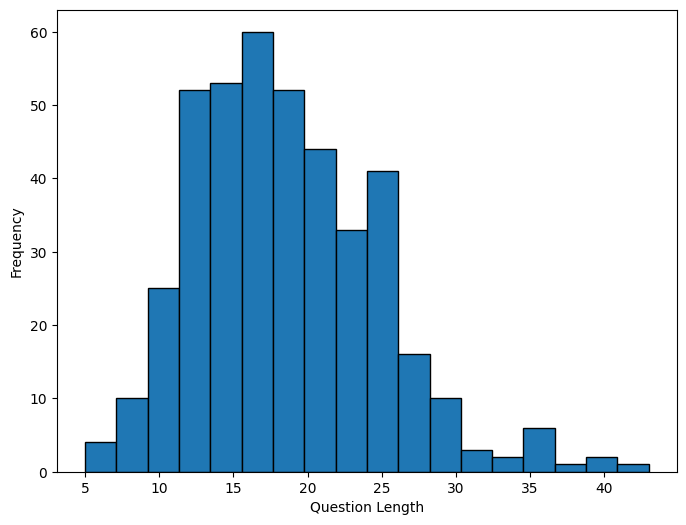

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['question_length'], bins='auto', edgecolor='black')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_bound = 10
upper_bound = 25

def get_length_score(length):
    if lower_bound <= length <= upper_bound:
        return 1
    elif length > upper_bound:
        return (upper_bound / length) ** 2
    else:
        return (length / lower_bound) ** 2

# Apply the function to calculate length_score and add it as a new column
df['length_score'] = df['question_length'].apply(get_length_score)

In [ ]:
# Filter questions with length_score < 1
length_outlier_mcqs = df[df['length_score'] < 1]
len(length_outlier_mcqs)

70

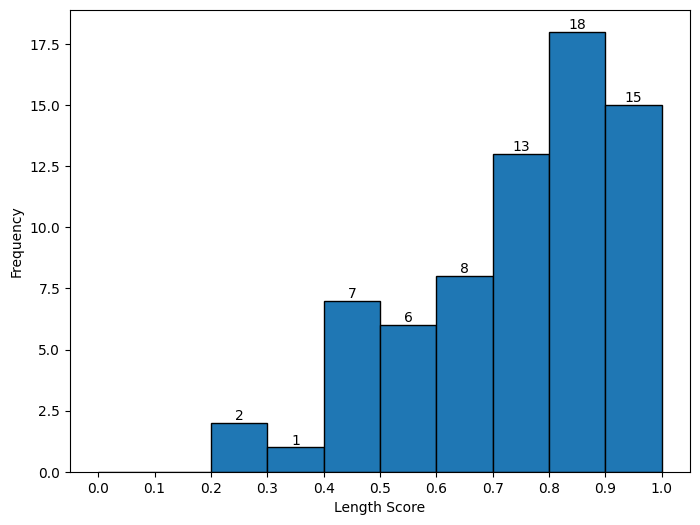

In [ ]:
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(length_outlier_mcqs['length_score'], bins=10, range=(0, 1), edgecolor='black')
plt.xticks([round(x * 0.1, 1) for x in range(11)])

# Add frequency labels on top of each bar
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')
plt.xlabel('Length Score')
plt.ylabel('Frequency')
plt.show()

# Level of Clarity

In [ ]:
import re

In [ ]:
def syllable_count(word):
    word = word.lower()
    syllable_count = len(re.findall(r'[aeiouy]+', word))  # Count vowel clusters as syllables
    return max(1, syllable_count)

# Function to compute readability
def compute_readability(text):
    words = text.split()
    num_words = len(words)
    num_sentences = text.count('.') + text.count('!') + text.count('?')
    num_syllables = sum(syllable_count(word) for word in words)

    if num_words == 0 or num_sentences == 0:
        return None  # To avoid division by zero

    readability = 0.39 * (num_words / num_sentences) + 11.8 * (num_syllables / num_words) - 15.59
    return readability

In [ ]:
df['readability'] = df['question'].apply(compute_readability)

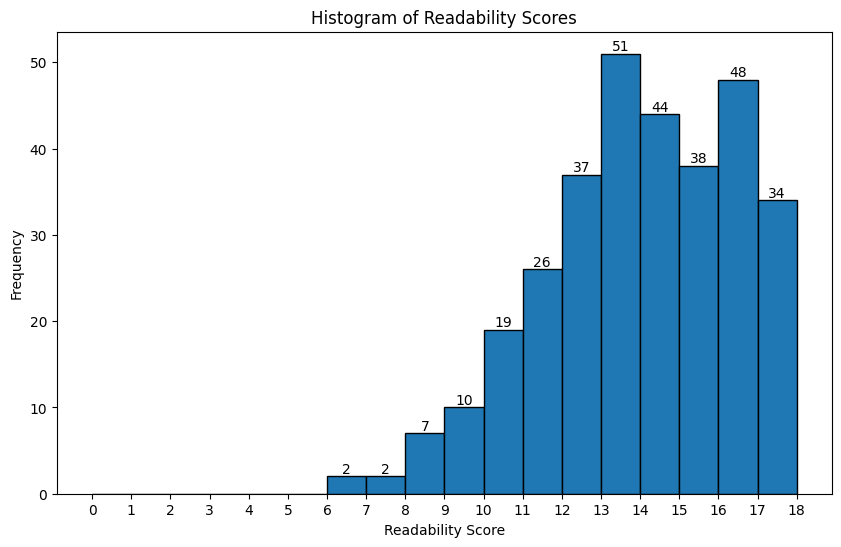

In [ ]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['readability'], bins=range(0, 19, 1), edgecolor='black')

# Set x-axis ticks from 0 to 18
plt.xticks(range(0, 19))

# Add frequency labels on top of each bar where frequency > 0
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores')
plt.show()

# Originality

In [ ]:
df['lisa_sheet'] = df['index'].map(lisa_sheets['content'])
df.head()

,question,option_a,option_b,option_c,option_d,correct_option,index,question_length,length_score,readability,lisa_sheet
0,What can be a serious consequence of gas effus...,Increased lung capacity,Gastrointestinal distress,Gaseous tamponade leading to haemodynamic failure,Improved oxygen saturation,C,0,20,1.000000,12.270000,- Gas effusion in the pleural cavity\n\n- May ...
1,"During a clinical examination, which of the fo...",Gastrointestinal signs and symptoms,Respiratory signs and haemodynamic signs,Neurological deficits and muscle weakness,Skin rashes and allergic reactions,B,1,21,1.000000,19.009524,These elements are systematically sought on cl...
2,Which combination of symptoms and physical sig...,"Sudden 'stabbing' chest pain, dyspnoea, subcut...","Chronic cough, wheezing, hyperresonance on per...","Fever, productive cough, dull percussion, and ...","Sudden 'stabbing' chest pain, breathing diffic...",A,2,15,1.000000,15.433333,"The diagnosis can be made clinically, but thor..."
3,"In the context of smoking cessation, what is t...",Pleurodesis is a primary method for smoking ce...,Pleurodesis is a procedure that helps in the p...,Pleurodesis is a specialist discussion conside...,Pleurodesis is a surgery to remove all tobacco...,C,3,17,1.000000,11.863529,Smoking cessation\n\nPleurodesis may be discus...
4,"When evaluating a patient for a pneumothorax, ...",Standard chest X-ray in a standing position,Pleural ultrasound,CT scan,MRI of the chest,C,5,37,0.456538,24.034595,"- Standard chest X-ray, standing and inspirato..."


In [ ]:
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphanumeric characters, convert to lower-case
    text = re.sub(r'\W+', ' ', text).lower().strip()

    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize and remove stopwords
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return cleaned_words

def get_trigrams(text):
    words = clean_text(text)
    return set(ngrams(words, 3))

def calculate_originality(question, lisa_sheet):
    question_trigrams = get_trigrams(question)
    lisa_sheet_trigrams = get_trigrams(lisa_sheet)

    unique_trigrams = question_trigrams - lisa_sheet_trigrams
    originality_score = len(unique_trigrams) / len(question_trigrams) if question_trigrams else 0
    return originality_score


In [ ]:
df['originality'] = df.apply(lambda row: calculate_originality(row['question'], row['lisa_sheet']), axis=1)
df.head()

,question,option_a,option_b,option_c,option_d,correct_option,index,question_length,length_score,readability,lisa_sheet,originality
0,What can be a serious consequence of gas effus...,Increased lung capacity,Gastrointestinal distress,Gaseous tamponade leading to haemodynamic failure,Improved oxygen saturation,C,0,20,1.000000,12.270000,- Gas effusion in the pleural cavity\n\n- May ...,0.75
1,"During a clinical examination, which of the fo...",Gastrointestinal signs and symptoms,Respiratory signs and haemodynamic signs,Neurological deficits and muscle weakness,Skin rashes and allergic reactions,B,1,21,1.000000,19.009524,These elements are systematically sought on cl...,1.00
2,Which combination of symptoms and physical sig...,"Sudden 'stabbing' chest pain, dyspnoea, subcut...","Chronic cough, wheezing, hyperresonance on per...","Fever, productive cough, dull percussion, and ...","Sudden 'stabbing' chest pain, breathing diffic...",A,2,15,1.000000,15.433333,"The diagnosis can be made clinically, but thor...",1.00
3,"In the context of smoking cessation, what is t...",Pleurodesis is a primary method for smoking ce...,Pleurodesis is a procedure that helps in the p...,Pleurodesis is a specialist discussion conside...,Pleurodesis is a surgery to remove all tobacco...,C,3,17,1.000000,11.863529,Smoking cessation\n\nPleurodesis may be discus...,1.00
4,"When evaluating a patient for a pneumothorax, ...",Standard chest X-ray in a standing position,Pleural ultrasound,CT scan,MRI of the chest,C,5,37,0.456538,24.034595,"- Standard chest X-ray, standing and inspirato...",1.00


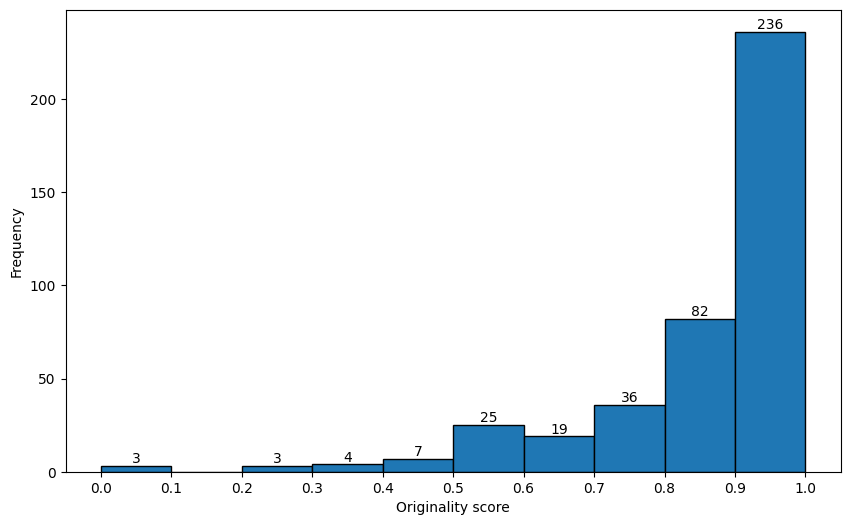

In [ ]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['originality'], bins=10, range=(0, 1), edgecolor='black')

plt.xticks([round(x * 0.1, 1) for x in range(11)])

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

plt.xlabel('Originality score')
plt.ylabel('Frequency')
plt.show()

# Disclosure

In [ ]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.52.2
    Uninstalling openai-1.52.2:
      Successfully uninstalled openai-1.52.2


In [ ]:
system_instructions = """
You are a proofreader and editor for educational quiz questions.
Your primary task is to determine whether a given question inadvertently reveals its own answer, thus making the question ineffective as an assessment tool.
You must carefully read the provided question and its correct answer, assess whether the question directly or indirectly contains clues that reveal the answer, and decide if a student could arrive at the correct answer solely based on the information within the question, without relying on external knowledge or critical thinking.
"""

In [ ]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

from google.colab import userdata

In [ ]:
model = ChatOpenAI(model="gpt-4o", temperature = 0.7, api_key = userdata.get("OPENAI_KEY"))

In [ ]:
class AnswerRevealed(BaseModel):
    answer_revealed: bool = Field(description="True if the question reveals the answer; False if it does not.")

response_parser = JsonOutputParser(pydantic_object=AnswerRevealed)

prompt_template = PromptTemplate(
    template="{system_instructions}\n{format_instructions}\n{question}\n{answer}\n",
    input_variables=["question", "answer"],
    partial_variables={"system_instructions": system_instructions, "format_instructions": response_parser.get_format_instructions()},
)

chain = prompt_template | model | response_parser

def get_answer_revealed(question, answer):
    return chain.invoke({"question": question, "answer": answer})

In [ ]:
import datetime
results = []
for index, row in df.iterrows():
    if index % 10 == 0:
        print(f'{index}, {datetime.datetime.now()}')
    try:
        question = row["question"]
        correct_option_idx = row['correct_option'].lower()
        correct_option = f'option_{correct_option_idx}'

        result = get_answer_revealed(question, correct_option)
        results.append((row['index'], result['answer_revealed']))
    except Exception as error:
        print("An exception occurred:", error)

0, 2024-11-12 10:24:27.281677
10, 2024-11-12 10:24:33.642744
20, 2024-11-12 10:24:39.883638
30, 2024-11-12 10:24:46.522409
40, 2024-11-12 10:24:52.928542
50, 2024-11-12 10:24:59.888467
60, 2024-11-12 10:25:06.732435
70, 2024-11-12 10:25:13.301970
80, 2024-11-12 10:25:19.823049
90, 2024-11-12 10:25:26.933136
100, 2024-11-12 10:25:33.447138
110, 2024-11-12 10:25:39.814177
120, 2024-11-12 10:25:46.432321
130, 2024-11-12 10:25:53.714316
140, 2024-11-12 10:26:00.901316
150, 2024-11-12 10:26:11.345596
160, 2024-11-12 10:26:18.063629
170, 2024-11-12 10:26:24.559542
180, 2024-11-12 10:26:31.758059
190, 2024-11-12 10:26:39.940420
200, 2024-11-12 10:26:47.622707
210, 2024-11-12 10:26:55.499620
220, 2024-11-12 10:27:01.757692
230, 2024-11-12 10:27:08.027009
240, 2024-11-12 10:27:16.205647
250, 2024-11-12 10:27:22.902343
260, 2024-11-12 10:27:39.451189
270, 2024-11-12 10:27:46.144301
280, 2024-11-12 10:27:53.113705
290, 2024-11-12 10:28:00.161731
300, 2024-11-12 10:28:06.398592
310, 2024-11-12 10:

In [ ]:
print(results)

[(0, False), (1, False), (2, False), (3, False), (5, False), (6, False), (7, False), (8, False), (9, False), (10, False), (11, False), (12, False), (13, False), (14, False), (15, False), (16, False), (17, False), (18, False), (19, False), (20, False), (21, False), (22, False), (23, False), (24, False), (25, False), (26, False), (27, False), (30, False), (31, False), (32, False), (35, False), (36, False), (37, False), (38, False)]


In [ ]:
for r in results:
  if (r[1] == True):
    print(r)

(15, True)
(25, True)
(36, True)
(39, True)
(47, True)
(50, True)
(70, True)
(74, True)
(76, True)
(78, True)
(80, True)
(84, True)
(95, True)
(119, True)
(134, True)
(142, True)
(146, True)
(150, True)
(157, True)
(201, True)
(209, True)
(257, True)
(259, True)
(281, True)
(296, True)
(322, True)
(330, True)
(342, True)
(346, True)
(378, True)
(385, True)
(419, True)
(452, True)
(456, True)
(458, True)
(460, True)
(498, True)


In [ ]:
answer_revealed_df = pd.DataFrame(results, columns=['index', 'answer_revealed'])
df = df.merge(answer_revealed_df, on='index', how='left')
df.head()

,question,option_a,option_b,option_c,option_d,correct_option,index,question_length,length_score,readability,lisa_sheet,originality,folder,answer_revealed
0,What can be a serious consequence of gas effus...,Increased lung capacity,Gastrointestinal distress,Gaseous tamponade leading to haemodynamic failure,Improved oxygen saturation,C,0,20,1.000000,12.270000,- Gas effusion in the pleural cavity\n\n- May ...,0.75,IC-360,False
1,"During a clinical examination, which of the fo...",Gastrointestinal signs and symptoms,Respiratory signs and haemodynamic signs,Neurological deficits and muscle weakness,Skin rashes and allergic reactions,B,1,21,1.000000,19.009524,These elements are systematically sought on cl...,1.00,IC-360,False
2,Which combination of symptoms and physical sig...,"Sudden 'stabbing' chest pain, dyspnoea, subcut...","Chronic cough, wheezing, hyperresonance on per...","Fever, productive cough, dull percussion, and ...","Sudden 'stabbing' chest pain, breathing diffic...",A,2,15,1.000000,15.433333,"The diagnosis can be made clinically, but thor...",1.00,IC-360,False
3,"In the context of smoking cessation, what is t...",Pleurodesis is a primary method for smoking ce...,Pleurodesis is a procedure that helps in the p...,Pleurodesis is a specialist discussion conside...,Pleurodesis is a surgery to remove all tobacco...,C,3,17,1.000000,11.863529,Smoking cessation\n\nPleurodesis may be discus...,1.00,IC-360,False
4,"When evaluating a patient for a pneumothorax, ...",Standard chest X-ray in a standing position,Pleural ultrasound,CT scan,MRI of the chest,C,5,37,0.456538,24.034595,"- Standard chest X-ray, standing and inspirato...",1.00,IC-360,False


In [ ]:
df['answer_revealed'].value_counts()

,count
answer_revealed,
False,378
True,37


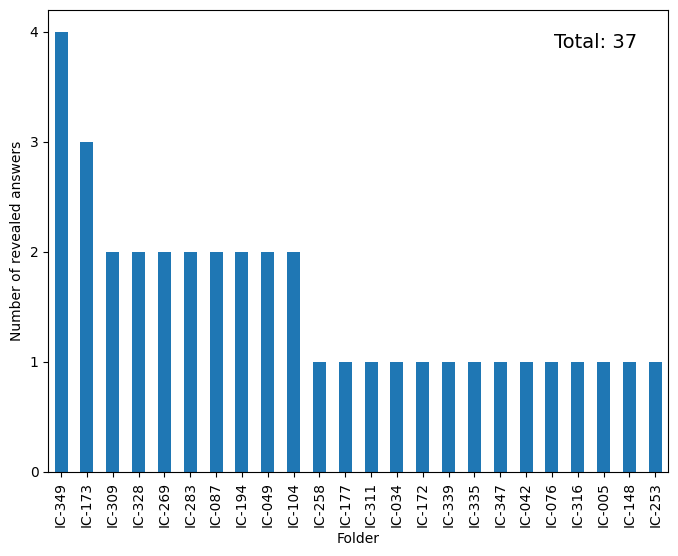

In [ ]:
df_answers_revealed = df[df['answer_revealed'] == True]

# Grouping by folder and counting occurrences
grouped_data = df_answers_revealed['folder'].value_counts()
grouped_data = grouped_data[grouped_data > 0]

# Plotting the results as a bar chart
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar')
plt.xlabel("Folder")
plt.ylabel("Number of revealed answers")
plt.xticks(rotation=90)
plt.yticks(range(0, int(grouped_data.max()) + 1))

plt.text(0.95, 0.95, f"Total: {grouped_data.sum()}", ha='right', va='top', transform=plt.gca().transAxes, fontsize=14, color='black')
plt.show()

In [ ]:
# df_answers_revealed.head()
print(df_answers_revealed.iloc[0]['question'])
print(df_answers_revealed.iloc[0]['option_a'])

What is the recommended method for calculating GFR according to the French National Authority for Health (2012) and why is it not suitable in cases of severe undernutrition or amyotrophy, cirrhosis, pregnancy, or non-standard body size?
Use the CKD-EPI formula based on creatinine levels determined by enzymatic methods.


In [ ]:
df.head()

,question,option_a,option_b,option_c,option_d,correct_option,index,question_length,length_score,readability,lisa_sheet,originality,folder,answer_revealed
0,What can be a serious consequence of gas effus...,Increased lung capacity,Gastrointestinal distress,Gaseous tamponade leading to haemodynamic failure,Improved oxygen saturation,C,0,20,1.000000,12.270000,- Gas effusion in the pleural cavity\n\n- May ...,0.75,IC-360,False
1,"During a clinical examination, which of the fo...",Gastrointestinal signs and symptoms,Respiratory signs and haemodynamic signs,Neurological deficits and muscle weakness,Skin rashes and allergic reactions,B,1,21,1.000000,19.009524,These elements are systematically sought on cl...,1.00,IC-360,False
2,Which combination of symptoms and physical sig...,"Sudden 'stabbing' chest pain, dyspnoea, subcut...","Chronic cough, wheezing, hyperresonance on per...","Fever, productive cough, dull percussion, and ...","Sudden 'stabbing' chest pain, breathing diffic...",A,2,15,1.000000,15.433333,"The diagnosis can be made clinically, but thor...",1.00,IC-360,False
3,"In the context of smoking cessation, what is t...",Pleurodesis is a primary method for smoking ce...,Pleurodesis is a procedure that helps in the p...,Pleurodesis is a specialist discussion conside...,Pleurodesis is a surgery to remove all tobacco...,C,3,17,1.000000,11.863529,Smoking cessation\n\nPleurodesis may be discus...,1.00,IC-360,False
4,"When evaluating a patient for a pneumothorax, ...",Standard chest X-ray in a standing position,Pleural ultrasound,CT scan,MRI of the chest,C,5,37,0.456538,24.034595,"- Standard chest X-ray, standing and inspirato...",1.00,IC-360,False


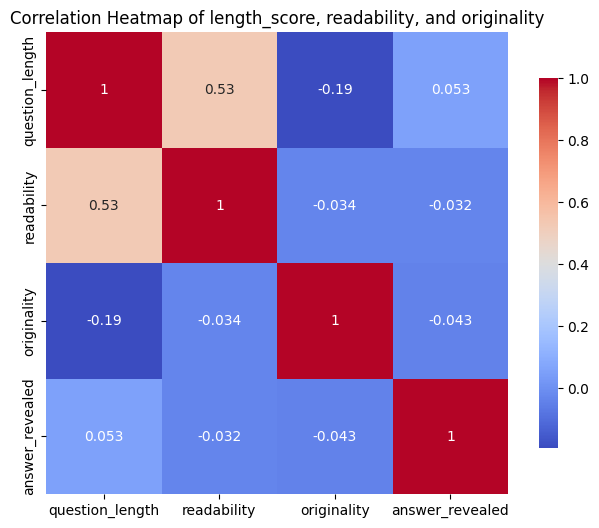

In [ ]:
import seaborn as sns

# Calculate the Pearson correlation matrix
correlation_matrix = df[['question_length', 'readability', 'originality', 'answer_revealed']].corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of length_score, readability, and originality")
plt.show()

To sum up:

Question length - can be improved

Readability - good

Originality - good

Reveals - can be improved

Content - can be imporved